In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, moment
from scipy.optimize import curve_fit
from numba import njit
from fits_library import *

In [2]:
@njit
def walk2D(n_steps):
    """
    A 2 dimensional walk with step length a which is a random variable with directions that is uniformly random
    """
    step = 0 #step length is in between 0 and 1 and is uniformly random
    direction = 0 #direction in between 0 and 2pi and is uniformly random
    x_traj = np.zeros(n_steps + 1) #coordinates in x direction
    y_traj = np.zeros(n_steps + 1) #coordinates in y direction
    x_traj[0] = 0; y_traj[0] = 0
    
    for i in range(1, n_steps+1):
        direction = np.random.uniform(0, 2*np.pi)
        step = np.random.uniform(0, 1)
        x_traj[i] = x_traj[i-1] + step * np.cos(direction)
        y_traj[i] = y_traj[i-1] + step * np.sin(direction)
    
    final_x = x_traj[-1]
    final_y = y_traj[-1]
    return x_traj, y_traj, final_x, final_y


"""
While doing this made a mistake where loop ran till n_steps - 1 which made the final step for both x and y direction equal to 0 which messed with the plot of the trajectory, i.e., the last point and the first point where joined by a straight line. Changing it to n_steps+1 made the last step of each trajectory non-zero which is what we want
"""

'\nWhile doing this made a mistake where loop ran till n_steps - 1 which made the final step for both x and y direction equal to 0 which messed with the plot of the trajectory, i.e., the last point and the first point where joined by a straight line. Changing it to n_steps+1 made the last step of each trajectory non-zero which is what we want\n'

In [3]:
n_steps = 2 ** 13; N = 2 ** 15;
X_traj, Y_traj, Final_X, Final_Y = np.zeros((N, n_steps + 1)), np.zeros((N, n_steps + 1)), np.zeros(N), np.zeros(N)
#ensure that the last two arguments are till N and not n_steps as we're taking the final value for N walks and not n_steps+1 walks- this threw us an error.
for i in range(N):
    X_traj[i], Y_traj[i], Final_X[i], Final_Y[i] = walk2D(n_steps)

In [4]:
"""
Find the probability of being somewhere. Multiply that with deltaR (which we have) to get the probability distribution.
Plot this against R itself to see what kind of distribution we get
"""

'\nFind the probability of being somewhere. Multiply that with deltaR (which we have) to get the probability distribution.\nPlot this against R itself to see what kind of distribution we get\n'

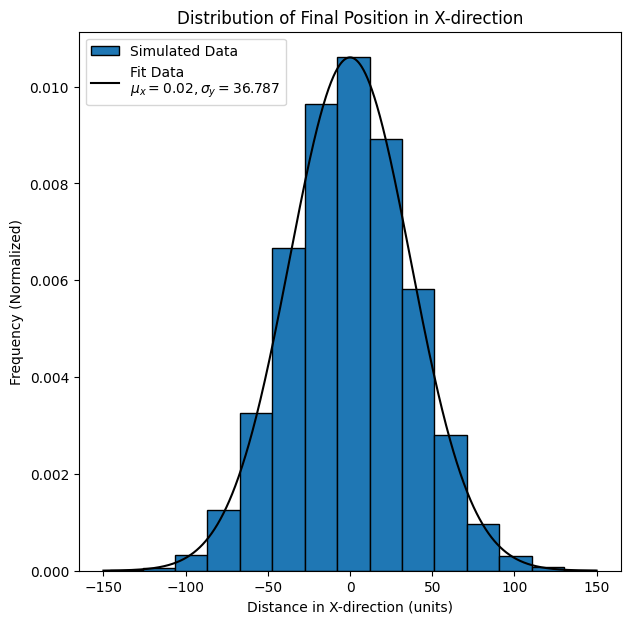

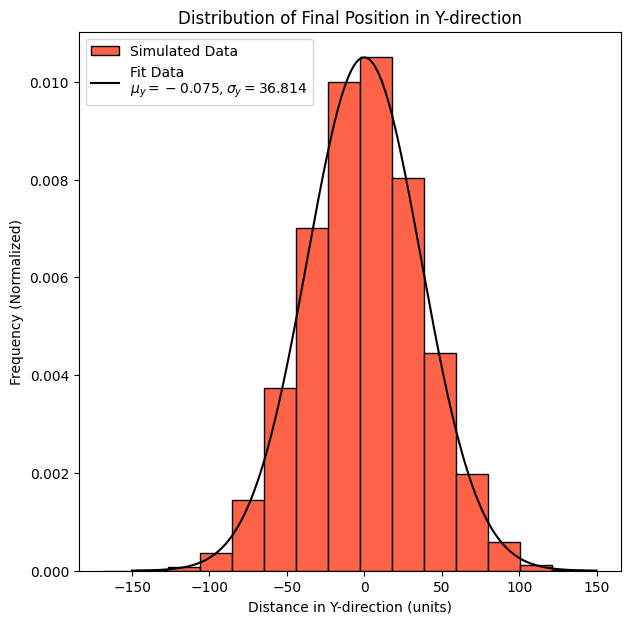

In [5]:
x = np.linspace(-150, 150, 1000)

#find the mean and the standard deviation for the final points in x and y direction and plot a gaussian using the formula over the histogram
mean_final_x = np.mean(Final_X)
mean_final_y = np.mean(Final_Y)
std_final_x = np.std(Final_X)
std_final_y = np.std(Final_Y)

plt.figure(figsize=(7,7))
#computing the gaussian and plotting over histogram
countsX, binsX, genObjX = plt.hist(Final_X, density = True, bins = 15, edgecolor = 'k', label = 'Simulated Data')
gaussian_x = max(countsX) * np.exp(-((x - mean_final_x)**2)/(2*std_final_x**2))
plt.plot(x, gaussian_x, color = 'k', label=r"Fit Data" "\n" r"$\mu_x"f"={round(mean_final_x,3)}," r"\sigma_y"f" = {round(std_final_x,3)}$")
plt.xlabel("Distance in X-direction (units)")
plt.ylabel("Frequency (Normalized)")
plt.title("Distribution of Final Position in X-direction")
plt.legend(loc = 'upper left')
plt.show()

plt.figure(figsize=(7,7))
countsY, binsY, genObjY = plt.hist(Final_Y, density = True, bins = 15, edgecolor = 'k', color = 'tomato', label="Simulated Data")
gaussian_y = max(countsY) * np.exp(-((x - mean_final_y)**2)/(2*std_final_y**2))
plt.plot(x, gaussian_y, color = 'k', label=r"Fit Data" "\n" r"$\mu_y"f"={round(mean_final_y,3)}," r"\sigma_y"f" = {round(std_final_y,3)}$")
plt.xlabel("Distance in Y-direction (units)")
plt.ylabel("Frequency (Normalized)")
plt.legend(loc = 'upper left')
plt.title("Distribution of Final Position in Y-direction")
plt.show()

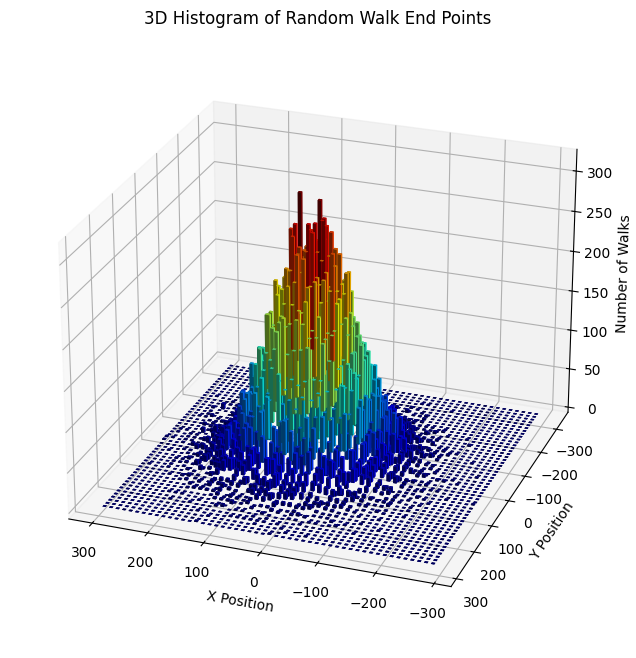

In [6]:
# Define the number of bins for the histogram
nb_bins_x = 50
nb_bins_y = 50

# Create the 3D histogram
hist, xedges, yedges = np.histogram2d(Final_X, Final_Y, bins=(nb_bins_x, nb_bins_y))

# Generate positions for the bars
xpos, ypos = np.meshgrid(xedges[:-1] + xedges[1:], yedges[:-1] + yedges[1:])

# Flatten the data for plotting
xpos = xpos.flatten()
ypos = ypos.flatten()
zpos = hist.flatten()

# Calculate bar width based on bin edges
dx = xedges[1] - xedges[0]
dy = yedges[1] - yedges[0]
dz = hist.flatten()  # Already flattened

# Define a colormap for the histogram
cmap = plt.cm.jet

# Get the minimum and maximum values for normalization
max_height = np.max(dz)
min_height = np.min(dz)

# Normalize z values for color mapping (0 to 1)
rgba = [cmap((k - min_height) / max_height) for k in dz]

# Create the 3D plot
#fig = plt.figure(figsize=(10, 7))
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the bars with color based on count
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba, zsort='average')

# Set labels and title
ax.set_xlabel('X Position')
ax.set_ylabel('Y Position')
ax.set_zlabel('Number of Walks')
ax.set_title('3D Histogram of Random Walk End Points')

# Adjust viewing angles (optional)
ax.view_init(elev=25, azim=110)  # Change these values for different views

plt.show()

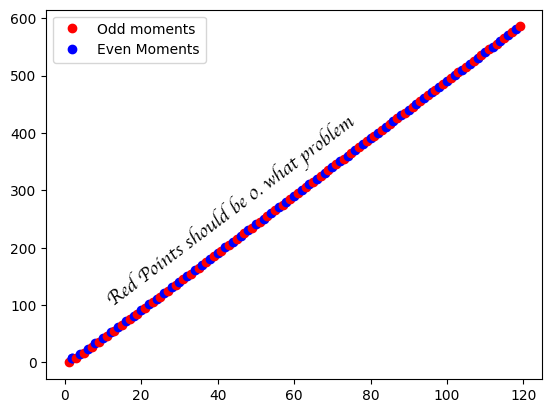

In [7]:
"""
Analysis of higher moments of X and Y gaussian distributions to check why they are non-zero. 
All odd moments should be 0.
"""

moments_x = np.zeros(120)
moments_y = np.zeros(120)

moments_x[0] = np.abs(moment(Final_X, moment = 1))
moments_x[1] = np.abs(moment(Final_X, moment = 2))
plt.plot(1, moments_x[0], 'ro', label = "Odd moments")
plt.plot(2, np.log(moments_x[1]), 'bo', label = "Even Moments")

for i in range(2, len(moments_x)):
    moments_x[i] = np.abs(moment(Final_X, moment = i))
    if i % 2 != 0:
        plt.plot(i, np.log(moments_x[i]), 'ro')
    else:
        plt.plot(i, np.log(moments_x[i]), 'bo')
plt.text(10, 100, "Red Points should be 0. what problem", fontdict = {'family':'cursive', 'size':'14'}, rotation = 37)
plt.legend()
plt.show()

In [8]:
moments_x[1]

1353.3074179766384

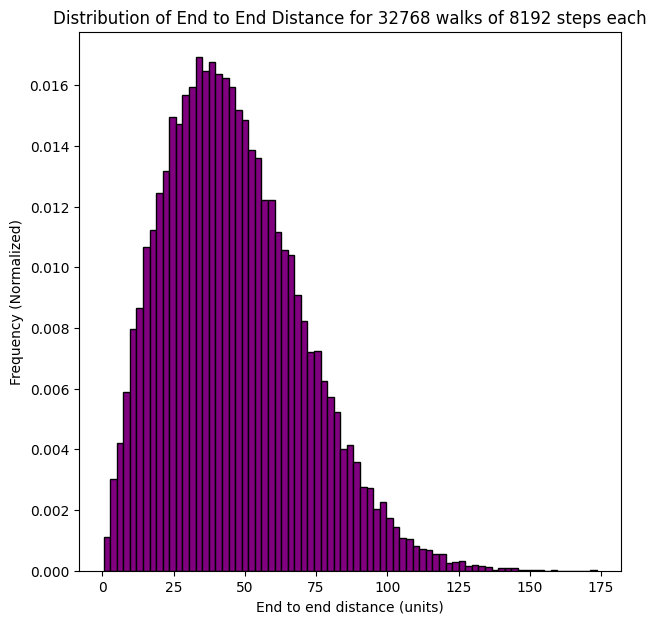

In [9]:
plt.figure(figsize=(7,7))
R_sq_mean = np.sqrt(Final_X**2+Final_Y**2)
counts, bins, genObj = plt.hist(R_sq_mean, bins = 75, density = True, edgecolor = 'k', color = 'purple')
"""xvals = np.linspace(bins[0], bins[-1], 1000)
boltzmann =  max(counts) * np.exp(-((xvals - np.mean(R))**2)/np.std(R)**2)
plt.plot(xvals, boltzmann)"""
plt.xlabel("End to end distance (units)")
plt.ylabel("Frequency (Normalized)")
plt.title(f"Distribution of End to End Distance for {N} walks of {n_steps} steps each")
plt.show()

In [10]:
R_mean = np.mean(R)
R_sq = R ** 2
R_sq_mean = np.mean(R_sq)
R_mean_sq = R_mean ** 2
deltaR = np.sqrt(R_sq_mean - R_mean_sq)

probabilities = counts * deltaR

def probModel(R_var, prop_const):
    return prop_const * 2 * np.pi * (R_var) * deltaR * np.exp(-((R_var - R_mean) ** 2)/(2*deltaR ** 2))

params, covariance = curve_fit(probModel, bins[1:], probabilities)

plt.scatter(bins[1:], probabilities)
plt.plot(bins[1:], probModel(bins[1:], params))
plt.show()

print(deltaR, np.std(R))

NameError: name 'R' is not defined

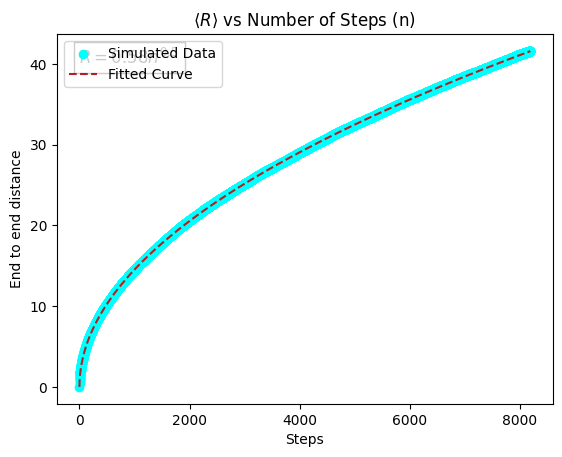

[0.45922337 0.50001947]


In [24]:
X_traj_sq = X_traj ** 2
Y_traj_sq = Y_traj ** 2

steps_arr = np.arange(n_steps + 1)
avg_X = np.mean(np.abs(X_traj), axis = 0)
avg_Y = np.mean(np.abs(Y_traj), axis = 0)
Rd = np.sqrt(avg_X**2 + avg_Y**2)

"""
See what the power law is for Rd vs n_steps
"""

def model(R_var, A, x):
    return A * pow(R_var, x)

params, covariance = curve_fit(model, steps_arr, Rd)


plt.scatter(steps_arr, Rd, label = 'Simulated Data', color = 'aqua')
plt.plot(steps_arr, model(steps_arr, *params), '--', color = 'firebrick', label = 'Fitted Curve')
plt.xlabel("Steps")
plt.ylabel("End to end distance")
plt.title(r'$\langle{R}\rangle$ vs Number of Steps (n)')
plt.legend(loc = 'upper left')
plt.text(0, 40, r'$R = 0.58n^{0.5}$', fontsize = 12, bbox = dict(facecolor = 'none'))
plt.show()
print(params)

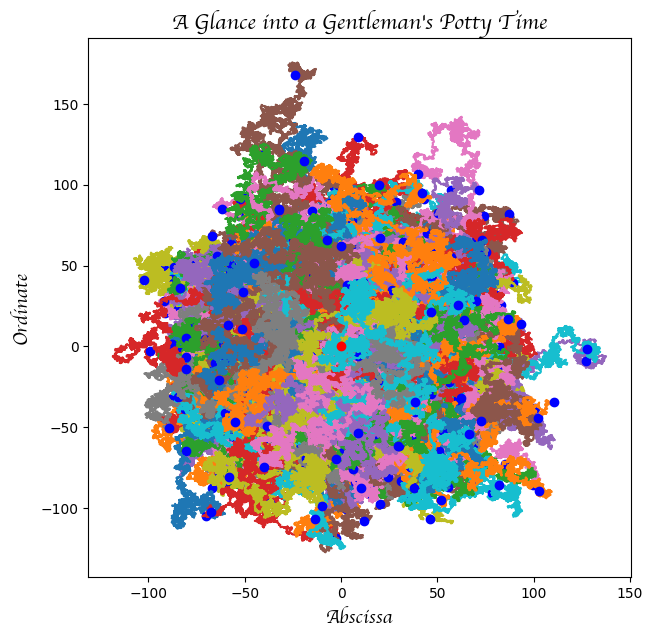

In [ ]:
plt.figure(figsize=(7,7))
for i in range(1000):
    plt.plot(X_traj[i], Y_traj[i])
    plt.plot(X_traj[i][0], Y_traj[i][0], 'ro')
    plt.plot(Final_X[i], Final_Y[i], 'bo')
font1 = {'family':'cursive', 
         'size':'14'}
font2 = {'family':'cursive', 
         'size':'16', 
         'weight':'bold'}
plt.xlabel("Abscissa", fontdict=font1)
plt.ylabel("Ordinate", fontdict=font1)
#plt.title("A Glance into a Gentleman's Perambulations", fontdict=font2)
plt.title("A Glance into a Gentleman's Potty Time", fontdict=font2)
plt.show()

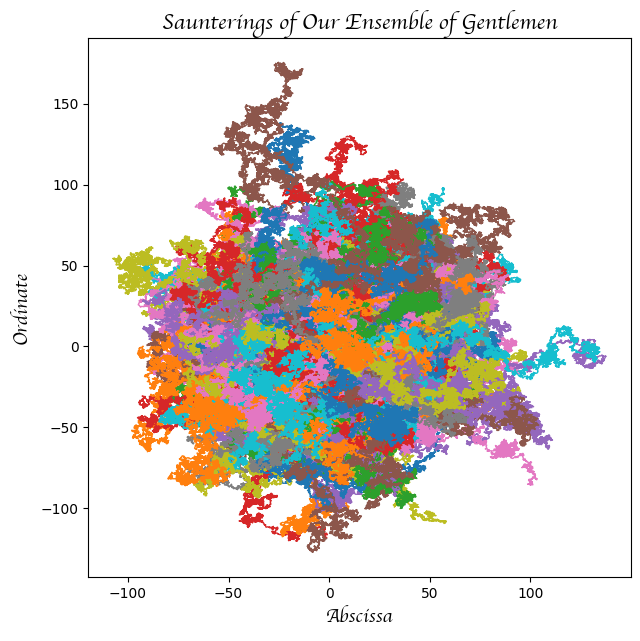

In [ ]:
plt.figure(figsize=(7,7))
for i in range(2 ** 9):
    plt.plot(X_traj[i], Y_traj[i], lw = 1)
plt.xlabel("Abscissa", fontdict=font1)
plt.ylabel("Ordinate", fontdict=font1)
plt.title("Saunterings of Our Ensemble of Gentlemen", fontdict=font2)
ax = plt.gca()
circle1 = plt.Circle((0, 0), 50, fill = False)
ax.add_patch(circle1)
plt.show()